In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [103]:
df = pd.read_csv("survey.csv")

In [104]:
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [106]:
df.drop_duplicates()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [107]:
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [108]:
df['Gender'].head(100)

,Gender
0,Female
1,M
2,Male
3,Male
4,Male
...,...
95,male
96,Male
97,male
98,Cis Male


In [109]:
df['state'] = df["state"].fillna("Not Applicable")
df = df.dropna(subset=['self_employed'])
df['work_interfere'] = df['work_interfere'].fillna("No data")
df['comments'] = df['comments'].fillna("No comments")

<ipython-input-109-206bc56b68e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_interfere'] = df['work_interfere'].fillna("No data")
<ipython-input-109-206bc56b68e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comments'] = df['comments'].fillna("No comments")


In [110]:
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0


In [111]:
df['Gender'].unique()

array(['male', 'Male', 'Female', 'female', 'M', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [112]:
df['Gender'] = df['Gender'].str.lower()
gender_mapping = {
    'male' : ['male', 'm', 'male-ish', 'maile', 'make', 'mal', 'man', 'msle',
             'mail', 'malr', 'something kinda male?',
             'cis male', 'male (cis)', 'guy (-ish) ^_^', 'male ', 'cis man',
             'ostensibly male, unsure what that really means'],
    'female' : ['female', 'female ', 'f', 'woman', 'femake', 'female (cis)',
               'femail', 'cis female', 'cis-female/femme'],
    'other' : ['trans-female', 'something else', 'non-binary', 'neuter',
              'female (trans)', 'queer/she/they', 'nah', 'all', 'enby', 'fluid',
              'genderqueer', 'androgyne',
              'agender', 'male leaning androgynous', 'trans woman', 'queer',
              'a little about you', 'p']
}

df['Standartized_gender'] = df['Gender'].apply(lambda x: next((key for key, value in gender_mapping.items() if x in value), x))



<ipython-input-112-6f93ef084320>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].str.lower()
<ipython-input-112-6f93ef084320>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Standartized_gender'] = df['Gender'].apply(lambda x: next((key for key, value in gender_mapping.items() if x in value), x))


In [113]:
df['Gender'].value_counts()

,count
Gender,
male,810
female,178
m,148
f,53
woman,4
make,4
male,3
cis male,3
female,2


In [114]:
gender_counts = df['Standartized_gender'].value_counts()
gender_counts

,count
Standartized_gender,
male,981
female,242
other,18


<ipython-input-115-fe2b85f65cf2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')


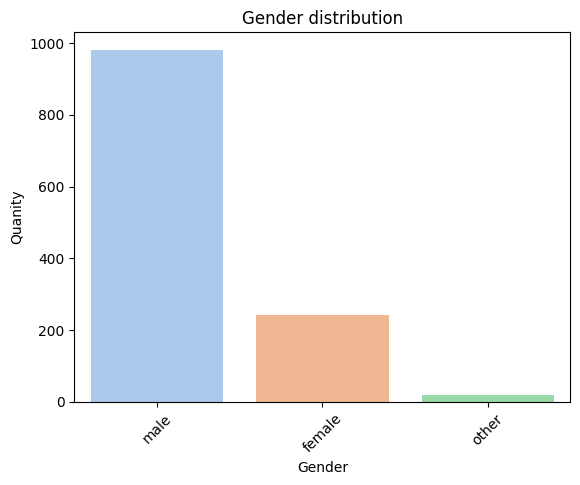

In [115]:
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Quanity')
plt.title('Gender distribution')
plt.xticks(rotation=45)
plt.show()

In [116]:
self_emp_count = df['self_employed'].value_counts()
self_emp_count

,count
self_employed,
No,1095
Yes,146


<ipython-input-117-f8e7f723f031>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=self_emp_count.index, y=self_emp_count.values, palette='pastel')


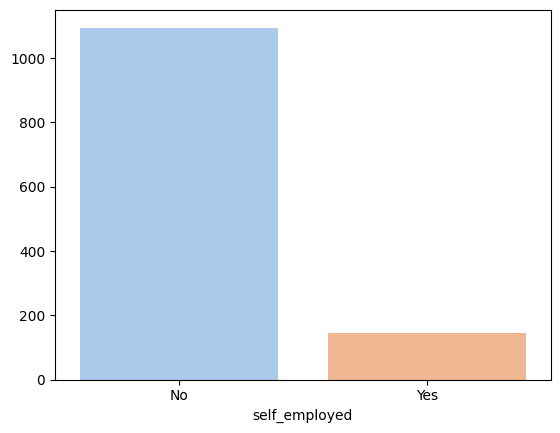

In [117]:
sns.barplot(x=self_emp_count.index, y=self_emp_count.values, palette='pastel')
plt.show()

<ipython-input-118-7650c0da5067>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remote_counts.index, y=remote_counts.values, palette='pastel')


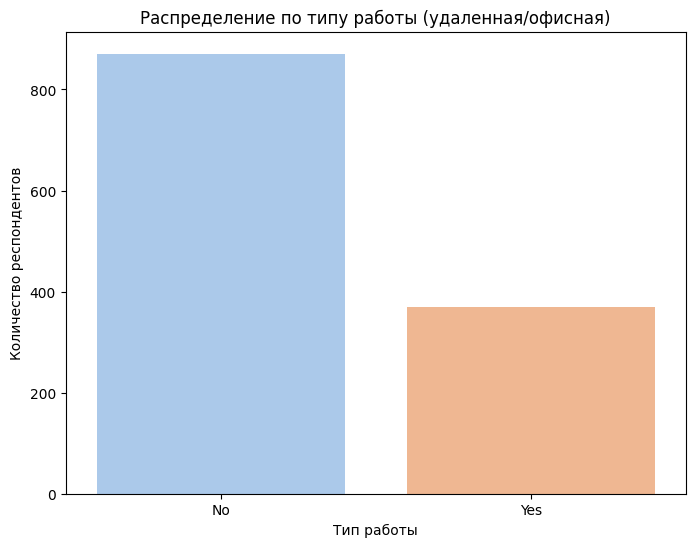

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Подсчет количества респондентов по типу работы
remote_counts = df['remote_work'].value_counts()

# Визуализация распределения по типу работы
plt.figure(figsize=(8, 6))
sns.barplot(x=remote_counts.index, y=remote_counts.values, palette='pastel')
plt.title('Распределение по типу работы (удаленная/офисная)')
plt.xlabel('Тип работы')
plt.ylabel('Количество респондентов')
plt.show()


<ipython-input-119-3c84aae427a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='remote_work', y='work_interfere', data=df, palette='pastel')


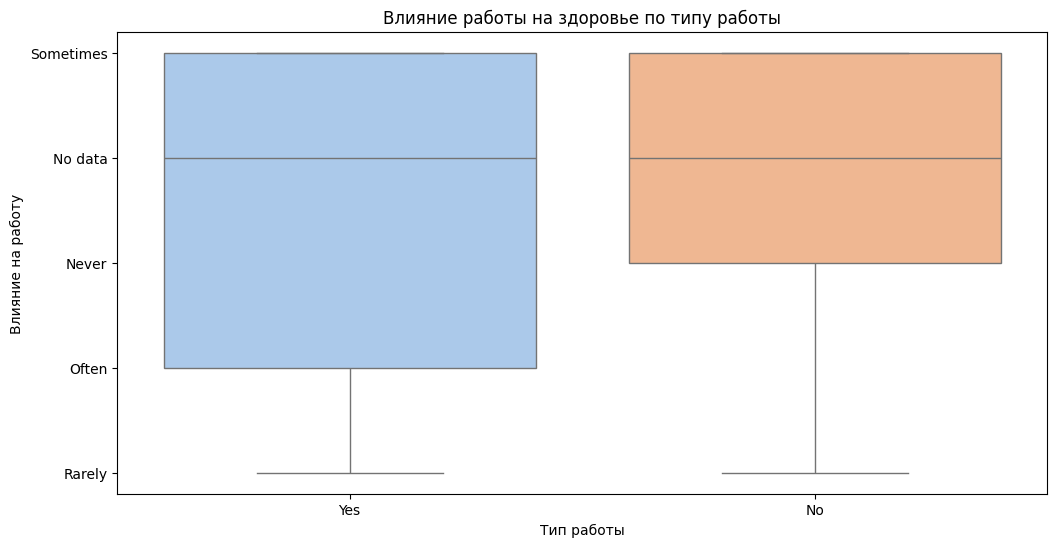

<ipython-input-119-3c84aae427a0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='remote_work', y='treatment', data=df, palette='pastel')


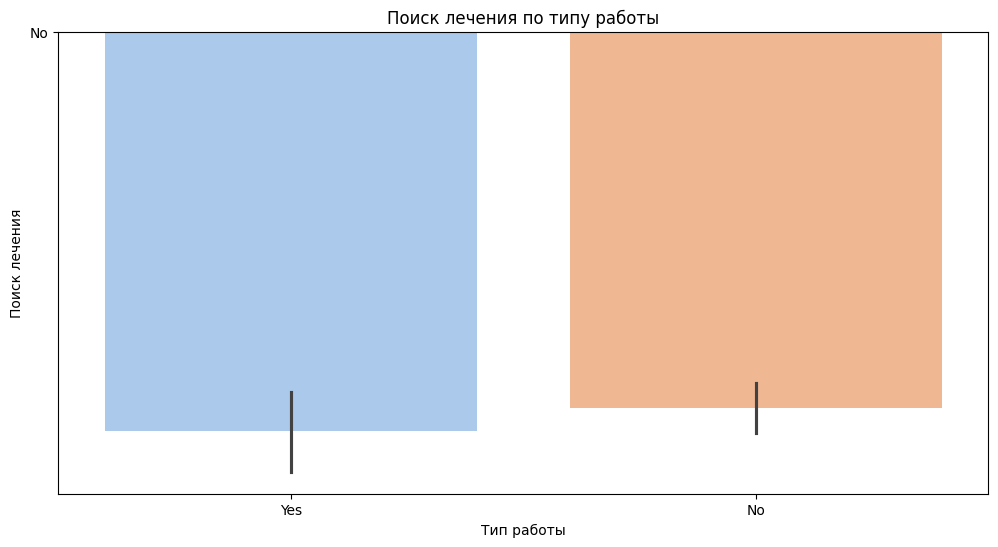

In [119]:
# Анализ влияния удаленной работы на работу
plt.figure(figsize=(12, 6))
sns.boxplot(x='remote_work', y='work_interfere', data=df, palette='pastel')
plt.title('Влияние работы на здоровье по типу работы')
plt.xlabel('Тип работы')
plt.ylabel('Влияние на работу')
plt.show()

# Анализ влияния удаленной работы на лечение
plt.figure(figsize=(12, 6))
sns.barplot(x='remote_work', y='treatment', data=df, palette='pastel')
plt.title('Поиск лечения по типу работы')
plt.xlabel('Тип работы')
plt.ylabel('Поиск лечения')
plt.show()


In [120]:
remote_counts

,count
remote_work,
No,871
Yes,370


In [121]:
remote_counts /remote_counts.sum()

,count
remote_work,
No,0.701853
Yes,0.298147


<ipython-input-122-83ba551618db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=family_history_count.index, y =family_history_count.values, palette='pastel')


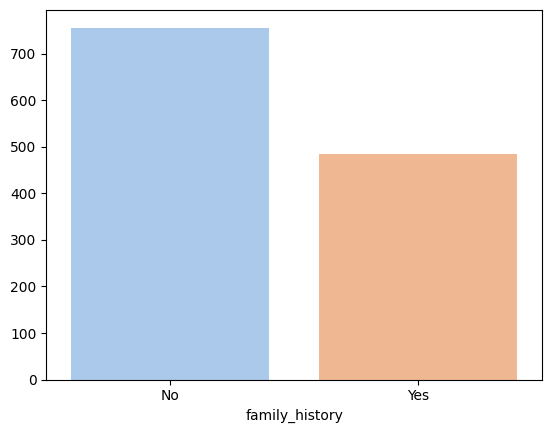

In [122]:
family_history_count = df['family_history'].value_counts()
sns.barplot(x=family_history_count.index, y =family_history_count.values, palette='pastel')
plt.show()

In [123]:
contingency_table = pd.crosstab(df['family_history'], df['treatment'])
contingency_table

treatment,No,Yes
family_history,,
No,488,268
Yes,125,360


In [124]:
contingency_table = pd.crosstab(df['family_history'], df['treatment']) #таблица сопряженности
print(contingency_table)

treatment        No  Yes
family_history          
No              488  268
Yes             125  360


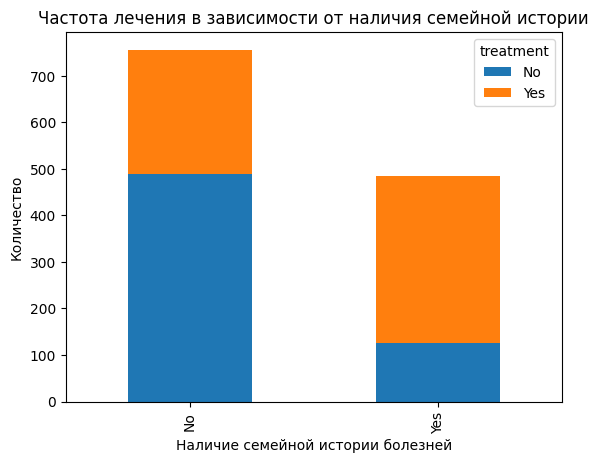

Chi2: 176.18387966117191, p-value: 3.301282103657581e-40
Существует значимая связь между наличием семейной истории и принятием лечения.


In [125]:
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Наличие семейной истории болезней')
plt.ylabel('Количество')
plt.title('Частота лечения в зависимости от наличия семейной истории')
plt.show()


chi2, p, _, _ = chi2_contingency(contingency_table) #критерий хи-квадрат
print(f'Chi2: {chi2}, p-value: {p}')


if p < 0.05:
    print('Существует значимая связь между наличием семейной истории и принятием лечения.')
else:
    print('Связь между наличием семейной истории и принятием лечения незначима.')


In [126]:
selected_features = ['Age', 'Standartized_gender', 'family_history', 'remote_work', 'tech_company']
df_selected = df[selected_features + ['treatment']]
df_encoded = pd.get_dummies(df_selected, columns=['Standartized_gender', 'family_history', 'remote_work', 'tech_company'])


In [127]:
X = df_encoded.drop('treatment', axis=1)
y = df_encoded['treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение моделей
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Оценка моделей
print("Логистическая регрессия:")
print(classification_report(y_test, y_pred_log_reg))

print("RandomForestClassifier:")
print(classification_report(y_test, y_pred_rf))

Логистическая регрессия:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00       183
         Yes       0.51      0.99      0.67       190

    accuracy                           0.51       373
   macro avg       0.25      0.50      0.34       373
weighted avg       0.26      0.51      0.34       373

RandomForestClassifier:
              precision    recall  f1-score   support

          No       0.63      0.68      0.65       183
         Yes       0.67      0.62      0.64       190

    accuracy                           0.65       373
   macro avg       0.65      0.65      0.65       373
weighted avg       0.65      0.65      0.65       373

